## Observations and Insights 

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [43]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [44]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [45]:
# Checking the number of mice in the DataFrame.
combined_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [46]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combined_data.duplicated(subset=['Mouse ID','Timepoint']).sum()

5

In [47]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID','Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [48]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.drop_duplicates(subset=['Mouse ID','Timepoint'])

In [49]:
# Checking the number of mice in the clean DataFrame.
clean_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_regimen_group = clean_df.groupby('Drug Regimen')
drug_regimen_group.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [51]:
tumor_volume_mean = drug_regimen_group['Tumor Volume (mm3)'].mean()
#tumor_volume_mean
tumor_volume_median = drug_regimen_group['Tumor Volume (mm3)'].median()
# tumor_volume_median
tumor_volume_variance = drug_regimen_group['Tumor Volume (mm3)'].var()
# tumor_volume_variance
tumor_volume_std = drug_regimen_group['Tumor Volume (mm3)'].std()
# tumor_volume_std
tumor_volume_sem = drug_regimen_group['Tumor Volume (mm3)'].sem()
# tumor_volume_sem

# This method is the most straightforward, creating multiple series and putting them all together at the end.
drug_regimen_stats = pd.concat([tumor_volume_mean, tumor_volume_median,tumor_volume_variance,tumor_volume_std,tumor_volume_sem], axis=1)
drug_regimen_stats.columns = ['tumor_volume_mean','tumor_volume_median','tumor_volume_variance','tumor_volume_std','tumor_volume_sem']
drug_regimen_stats

,tumor_volume_mean,tumor_volume_median,tumor_volume_variance,tumor_volume_std,tumor_volume_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [52]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

drug_regimen_group_counts = drug_regimen_group['Drug Regimen'].count()
drug_regimen_group_counts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

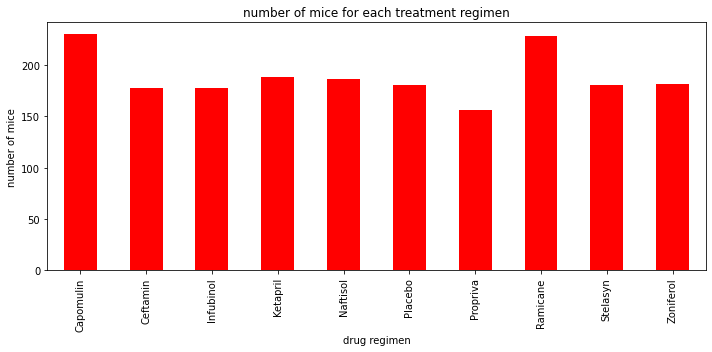

In [53]:
plot_pandas = drug_regimen_group_counts.plot(kind='bar', figsize=(10,5), title="number of mice for each treatment regimen", color="r")

plot_pandas.set_xlabel("drug regimen")
plot_pandas.set_ylabel("number of mice")
plt.tight_layout()
plt.show()

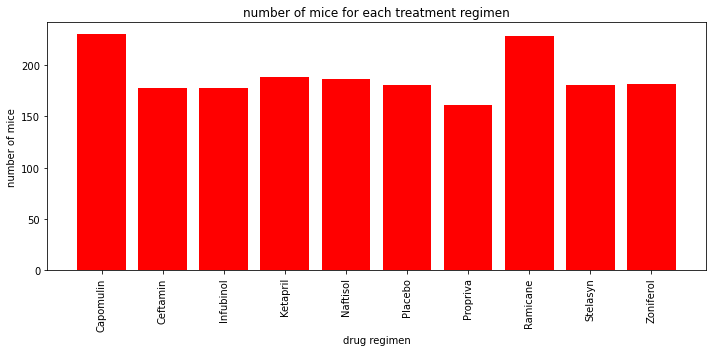

In [67]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.


mice_no = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

x_axis = np.arange(len(drug_regimen_group_counts))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,5))
plt.bar(x_axis, mice_no, color='r', align='center')
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.title("number of mice for each treatment regimen")
plt.xlabel("drug regimen")
plt.ylabel("number of mice")
plt.tight_layout()
plt.show()

## Pie Plots

In [55]:
# Group by gender

mouse_gender = mouse_metadata.groupby("Sex")

# no of each gender
mouse_gender_count = pd.DataFrame(mouse_gender['Sex'].count())
mouse_gender_count.head()

,Sex
Sex,
Female,124
Male,125


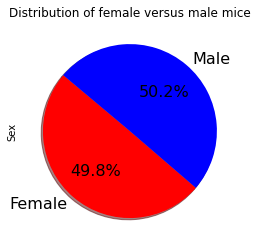

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender_count.plot(kind='pie', y='Sex', title="Distribution of female versus male mice",\
                        startangle=140, autopct='%1.1f%%',shadow=True, fontsize=16,\
                         colors =["r","b"],legend =False)

plt.show()


Text(0.5, 1.0, 'Distribution of female versus male mice')

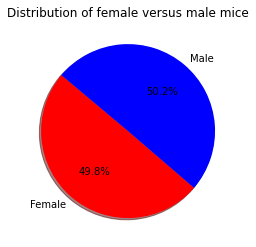

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create Labels for the sections of the pie
labels = ["Female","Male"]

sizes = [49.8,50.2]

colors = ['r', 'b']

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Distribution of female versus male mice")


## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers.

In [59]:
#Extract the 4 promising regimenes in seprate df

promising_regimens = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
promising_regimens = promising_regimens.sort_values(["Timepoint"], ascending=True)
# promising_regimens

promising_regimens_data = promising_regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

promising_regimens_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [60]:
#Group data by Drug Regimen and Mouse ID to capture Last Tumor Measurement

promising_regimens_sort = promising_regimens_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
# promising_regimens_sort.head()

# Turn retrieved data into dataframe to easily manipulate
promising_regimens_df = promising_regimens_sort.to_frame()
promising_regimens_df

#Create a list for dataframe and ticks labeling
promising_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']



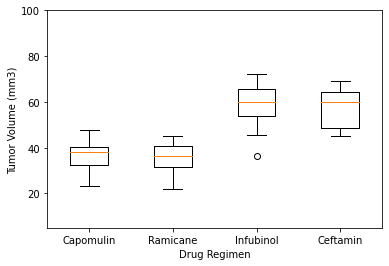

In [68]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

final_df = promising_regimens_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(promising_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=promising_4)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(5, 100)
plt.show()

## Line and Scatter Plots

In [69]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# extract Capomulin data to select a single mouse
capomulin_data = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [70]:
#extract the data for the mouse id "s185"
time_vs_tumor = clean_df[clean_df["Mouse ID"].isin(["s185"])]
time_vs_tumor

#create new df with the desired data only
time_vs_tumor_data = time_vs_tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumor_data

,Mouse ID,Timepoint,Tumor Volume (mm3)
10,s185,0,45.000000
11,s185,5,43.878496
12,s185,10,37.614948
13,s185,15,38.177232
14,s185,20,36.866876
15,s185,25,33.949940
16,s185,30,32.959671
17,s185,35,28.328531
18,s185,40,25.472143
19,s185,45,23.343598


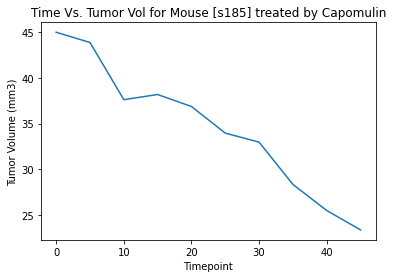

In [71]:
#line plot for time point vs. tumor volume for mouse id "s185"
x_axis = time_vs_tumor_data['Timepoint']
y_axis = time_vs_tumor_data['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis)
plt.title("Time Vs. Tumor Vol for Mouse [s185] treated by Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [72]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [73]:
# groupby mouse id and get the mean for the wight and the tumor volume for each mouse
capomulin_scatter = capomulin_data.groupby(['Mouse ID']).agg(\
                     Mouse_Weight = ('Weight (g)', np.mean),\
                     Avg_Tumor_Vol = ('Tumor Volume (mm3)', np.mean))                       
capomulin_scatter

,Mouse_Weight,Avg_Tumor_Vol
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


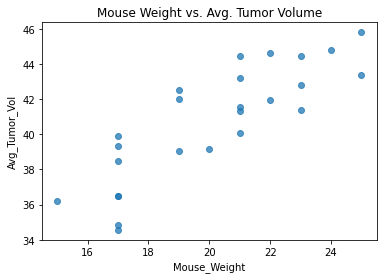

In [75]:
#Scatter plot
plt.scatter(
    capomulin_scatter['Mouse_Weight'],
    capomulin_scatter['Avg_Tumor_Vol'],
    marker='o', alpha=.75)

plt.title("Mouse Weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse_Weight")
plt.ylabel("Avg_Tumor_Vol")

plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [76]:
#Correlation Coefficient calculation
corr_coef = st.pearsonr(capomulin_scatter['Mouse_Weight'],capomulin_scatter['Avg_Tumor_Vol'])
print(f"The correlation is {corr_coef[0]}")

The correlation is 0.8419363424694717


In [77]:
# Linear regression clculation 
x_values = capomulin_scatter['Mouse_Weight']
y_values = capomulin_scatter['Avg_Tumor_Vol']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The equation of the linear regression is: {equation}")

The equation of the linear regression is: y = 0.95x + 21.55


Text(0, 0.5, 'Avg_Tumor_Vol')

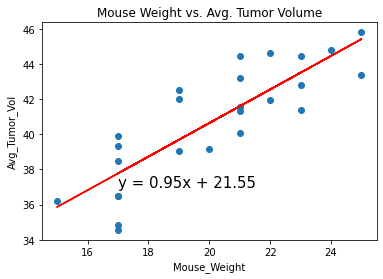

In [79]:
#plot linear regression model on the scatter plot

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(17,37),fontsize=15,color="black")
plt.title("Mouse Weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse_Weight")
plt.ylabel("Avg_Tumor_Vol")